# Relevance Vector Machine - Regression

In [2]:
import itertools
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import numpy as np
import seaborn as sns
from sklearn.metrics import mean_squared_error

from RVM import RVM

## 1) Linear dataset

In [7]:
# Number of samples.
N = 50

X = np.linspace(0,10,N)
Y = 2*X
T = Y + np.random.randn(N)

X = X.reshape(N,1)

print('X shape:', X.shape)
print('T shape:', T.shape)

X shape: (50, 1)
T shape: (50,)


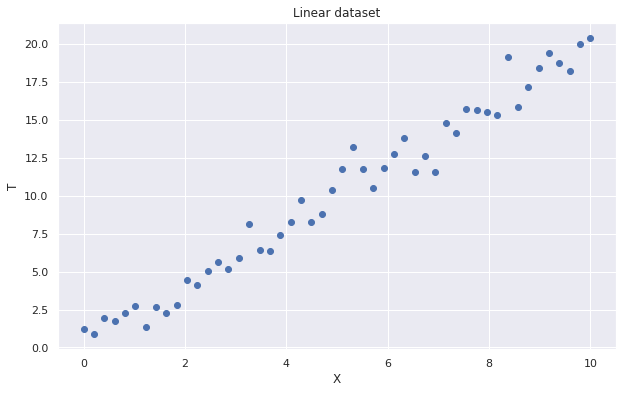

In [8]:
fig = plt.figure(figsize=(10, 6))
sns.set(style="darkgrid")
plt.scatter(X, T)
plt.title('Linear dataset')
plt.xlabel('X')
plt.ylabel('T')
plt.show()

In [9]:
rvm = RVM(coef0=0.001)

rvm.fit(X,T)

X_test = np.linspace(0,10,N)
X_test = X_test.reshape(N,1)
y_pred, sigma = rvm.predict(X_test)

print('RMSE:', np.sqrt(mean_squared_error(y_pred, Y)))

relevance_vect = rvm.get_relevance_vectors()
indexes_relev_vect = [i for i,x in enumerate(X) if x in relevance_vect]

print('Number of relevance vectors:', relevance_vect.shape[0])

RMSE: 0.11987303096258334
Number of relevance vectors: 3


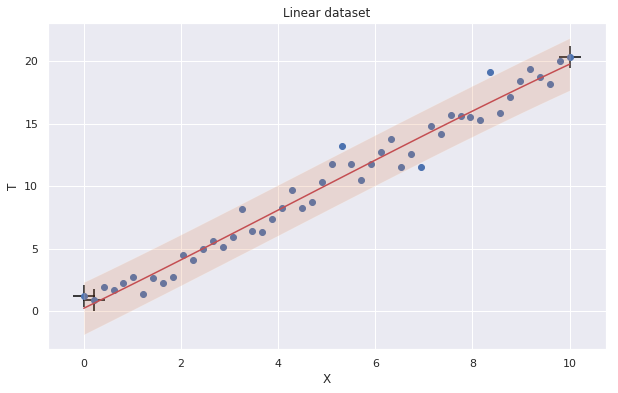

In [10]:
fig = plt.figure(figsize=(10, 6))
sns.set(style="darkgrid")
plt.plot(X_test, y_pred,c='r')
plt.scatter(relevance_vect, T[indexes_relev_vect], c='black', marker='+', s=500)
plt.scatter(X, T)
plt.fill_between(X_test.flatten(), y_pred - 2*np.sqrt(np.diag(sigma)), y_pred + 2*np.sqrt(np.diag(sigma)), alpha=0.2)
plt.title('Linear dataset')
plt.xlabel('X')
plt.ylabel('T')
plt.show()

fig.savefig('linear_data.pdf')

## 2) Sinus cardinal dataset

### Without noise

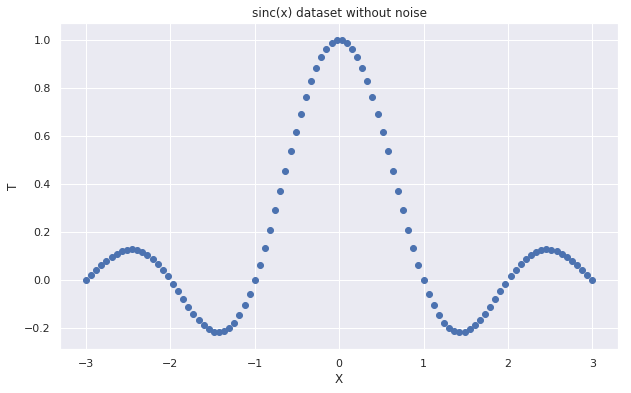

In [12]:
N = 100

X = np.linspace(-3,3,N)
Y = np.sinc(X)
T = Y

X = X.reshape(N,1)

fig = plt.figure(figsize=(10, 6))
sns.set(style="darkgrid")
plt.scatter(X, T)
plt.xlabel('X')
plt.ylabel('T')
plt.title('sinc(x) dataset without noise')
plt.show()

RMSE: 0.0031783835466712243


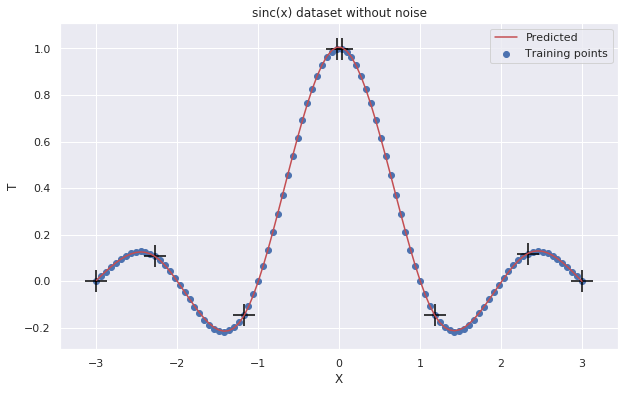

In [13]:
rvm = RVM(kernel='linear_spline', threshold_alpha=1e9, alpha=1e-15, sigma=0.001)

rvm.fit(X,T)

relevance_vect = rvm.get_relevance_vectors()
indexes_relev_vect = [i for i,x in enumerate(X) if x in relevance_vect]

y_pred, sigma = rvm.predict(X)

print('RMSE:', np.sqrt(mean_squared_error(y_pred, Y)))

fig = plt.figure(figsize=(10, 6))
sns.set(style="darkgrid")
plt.plot(X, y_pred, c='r', label='Predicted')
plt.scatter(X, T, label='Training points')
plt.scatter(relevance_vect, T[indexes_relev_vect], c='black', marker='+', s=500)
plt.xlabel('X')
plt.ylabel('T')
plt.title('sinc(x) dataset without noise')
plt.legend()
plt.show()

fig.savefig('sinc_rvm_without_noise.pdf')

### With noise

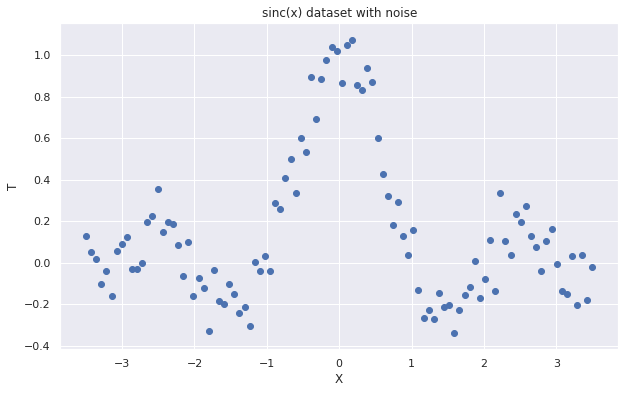

In [14]:
N = 100

X = np.linspace(-3.5,3.5,N)
Y = np.sinc(X)
T = Y + np.random.randn(N) * 0.1

X = X.reshape(N,1)

fig = plt.figure(figsize=(10, 6))
sns.set(style="darkgrid")
plt.scatter(X, T)
plt.xlabel('X')
plt.ylabel('T')
plt.title('sinc(x) dataset with noise')
plt.show()

RMSE: 0.05774141336608133


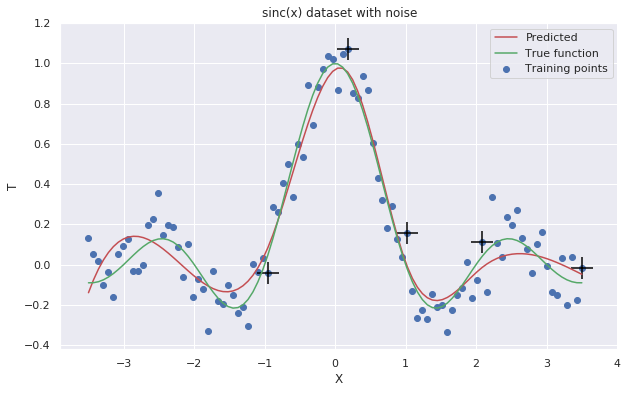

In [15]:
rvm = RVM(kernel='linear_spline', threshold_alpha=1e9, alpha=1e-5, sigma=0.1)

rvm.fit(X,T)

relevance_vect = rvm.get_relevance_vectors()
indexes_relev_vect = [i for i,x in enumerate(X) if x in relevance_vect]

y_pred, sigma = rvm.predict(X)

print('RMSE:', np.sqrt(mean_squared_error(y_pred, Y)))

fig = plt.figure(figsize=(10, 6))
sns.set(style="darkgrid")
plt.plot(X, y_pred, c='r', label='Predicted')
plt.scatter(X, T, label='Training points')
plt.scatter(relevance_vect, T[indexes_relev_vect], c='black', marker='+', s=500)
plt.plot(X, Y, c='g', label='True function')
plt.xlabel('X')
plt.ylabel('T')
plt.legend()
plt.title('sinc(x) dataset with noise')
plt.show()

fig.savefig('sinc_rvm_with_noise.pdf')

## 3) Extension

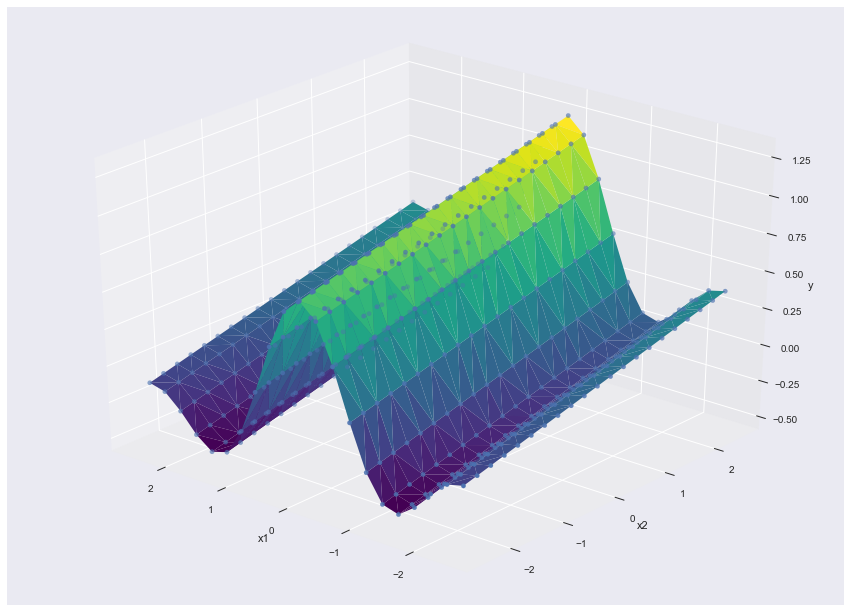

In [2]:
N = 20

X_1 = np.linspace(-2.5,2.5,N+1)
X_2 = np.linspace(-2.5,2.5,N+1)

X = np.zeros(((N+1)**2, 2))

for i, x in enumerate(itertools.product(X_1, X_2)):
    X[i, :] = x
    
'''X_train = np.random.uniform(-2.5,2.5, size=(200,2))
Y_train = np.sinc(X_train[:, 0]) + 0.1*X_train[:, 1]
T_train = Y_train #+ np.random.randn(N) * 0.1'''


Y = np.sinc(X[:, 0]) + 0.1*X[:, 1]
T = Y #+ np.random.randn(N) * 0.1

# Safe.
#Y = None

sns.set(style="darkgrid")
fig = plt.figure()
fig.set_size_inches(15, 11)
ax = fig.gca(projection='3d')
ax.invert_xaxis()
ax.plot_trisurf(X[:,0], X[:,1], Y, cmap=plt.cm.viridis, linewidth=0.2)
ax.scatter(X[:,0], X[:,1], Y, cmap=plt.cm.viridis, linewidth=0.2)
ax.view_init(30, -50)
ax.set_xlabel('x1'); ax.set_ylabel('x2'); ax.set_zlabel('y')
plt.show()

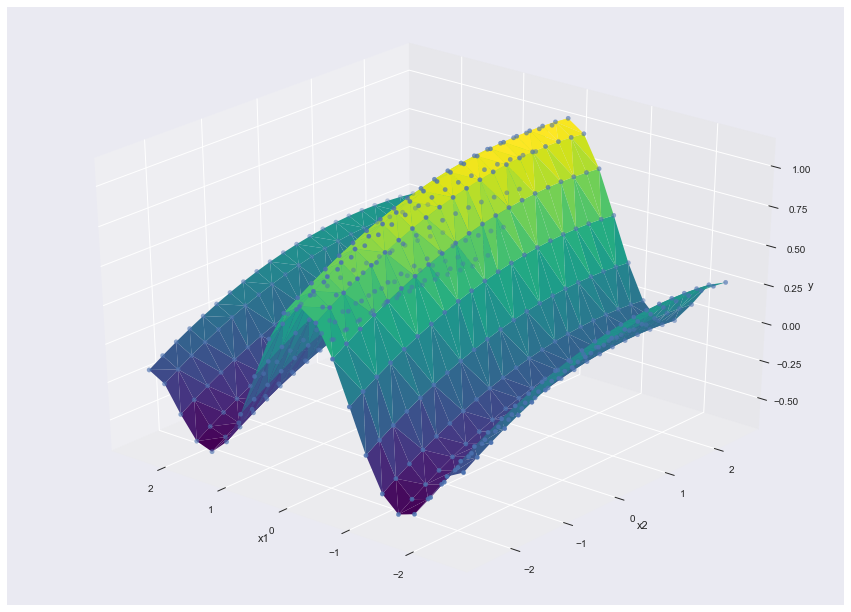

Number of relevance vectors: 7
RMSE :  0.08130783482175377


In [4]:
rvm = RVM(kernel='exponential', threshold_alpha=1e10, alpha=1e-5, sigma=0.101)

rvm.fit(X,T)

relevance_vect = rvm.get_relevance_vectors()
indexes_relev_vect = [i for i,x in enumerate(X) if x in relevance_vect]

y_pred, sigma = rvm.predict(X)

sns.set(style="darkgrid")
fig = plt.figure()
fig.set_size_inches(15, 11)
ax = fig.gca(projection='3d')
ax.invert_xaxis()
ax.plot_trisurf(X[:,0], X[:,1], y_pred, cmap=plt.cm.viridis, linewidth=0.2)
ax.scatter(X[:,0], X[:,1], y_pred, cmap=plt.cm.viridis, linewidth=0.2)
ax.view_init(30, -50)
ax.set_xlabel('x1'); ax.set_ylabel('x2'); ax.set_zlabel('y')
plt.show()

print('Number of relevance vectors:', relevance_vect.shape[0])
print("RMSE : ", np.sqrt(mean_squared_error(y_pred, Y)))
